In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage
from scipy import signal

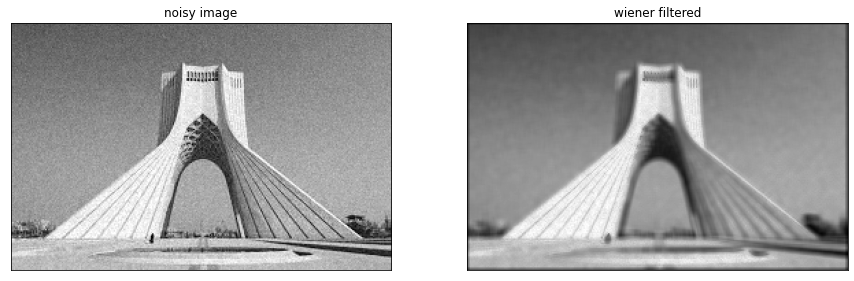

In [21]:
img = cv2.imread("azadi_tower.jpg", cv2.IMREAD_GRAYSCALE)
# Apply gaussian noise
noisy_img = skimage.util.random_noise(img, mode='gaussian', mean=0.0 ,var=0.001)
noisy_img = cv2.normalize(noisy_img.astype("float"), None, 0.0, 1.0, cv2.NORM_MINMAX)

win = (5,5)
localMean = signal.convolve2d(noisy_img, np.ones(win), mode='same')/(win[0]*win[1])
localVariance  = signal.convolve2d(noisy_img**2, np.ones(win), mode='same')/((win[0]*win[1])- localMean**2)

noiseVariance = np.mean(np.mean(localVariance))

r = localMean + (np.maximum(0, localVariance - noiseVariance)) / np.maximum(localVariance, noiseVariance) * (noisy_img - localMean)


fig, axes= plt.subplots(1, 2, figsize=(15, 8))

axes[0].imshow(noisy_img, 'gray')
axes[0].set_title('noisy image')

axes[1].imshow(r, 'gray')
axes[1].set_title('wiener filtered')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
